In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('Obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df.shape

(2111, 17)

In [5]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Text(0, 0.5, 'Count')

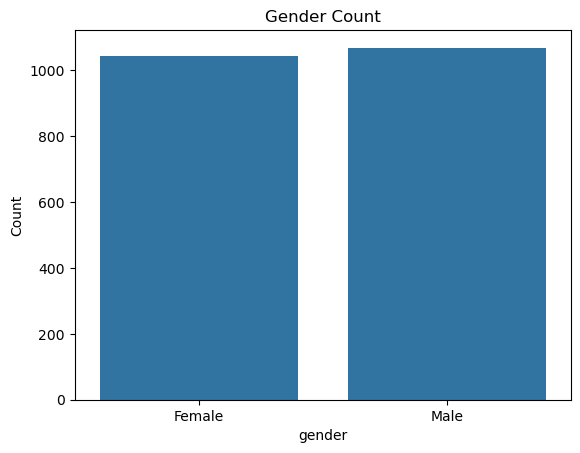

In [9]:
sns.countplot(data=df,x='Gender');
plt.title('Gender Count')
plt.xlabel('gender')
plt.ylabel('Count')

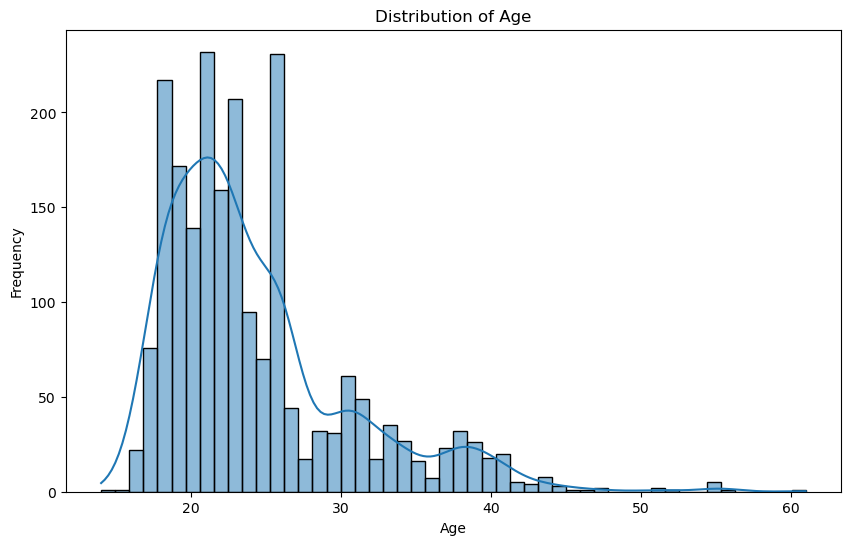

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

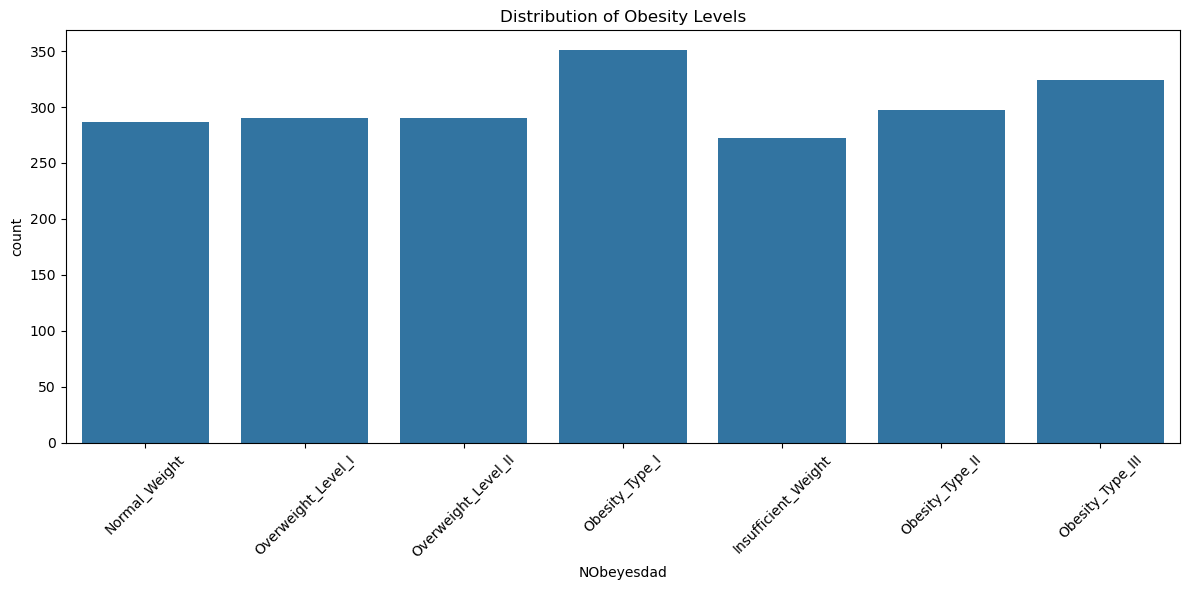

In [11]:
# 2. Target Variable Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NObeyesdad')
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Levels')
plt.tight_layout()
plt.show()

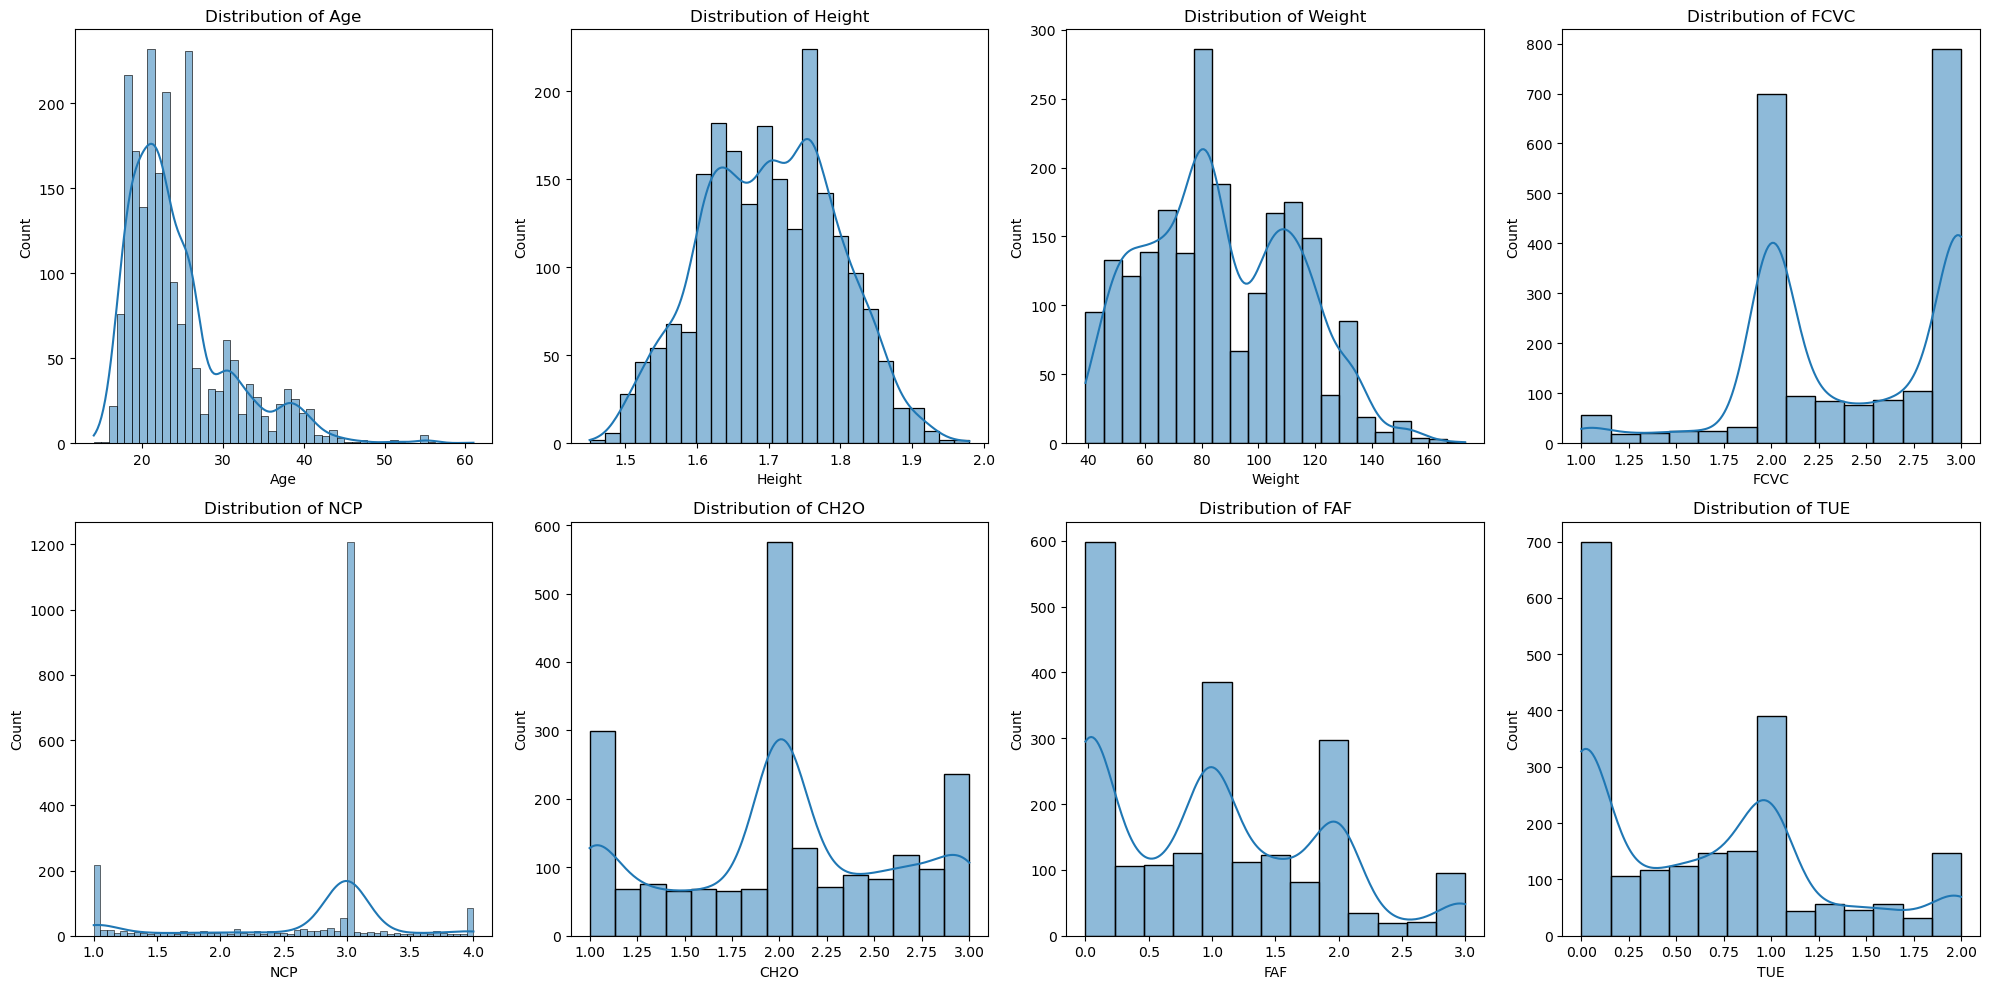

In [12]:
# 3. Numerical Variables Analysis
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create distribution plots for numerical variables
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


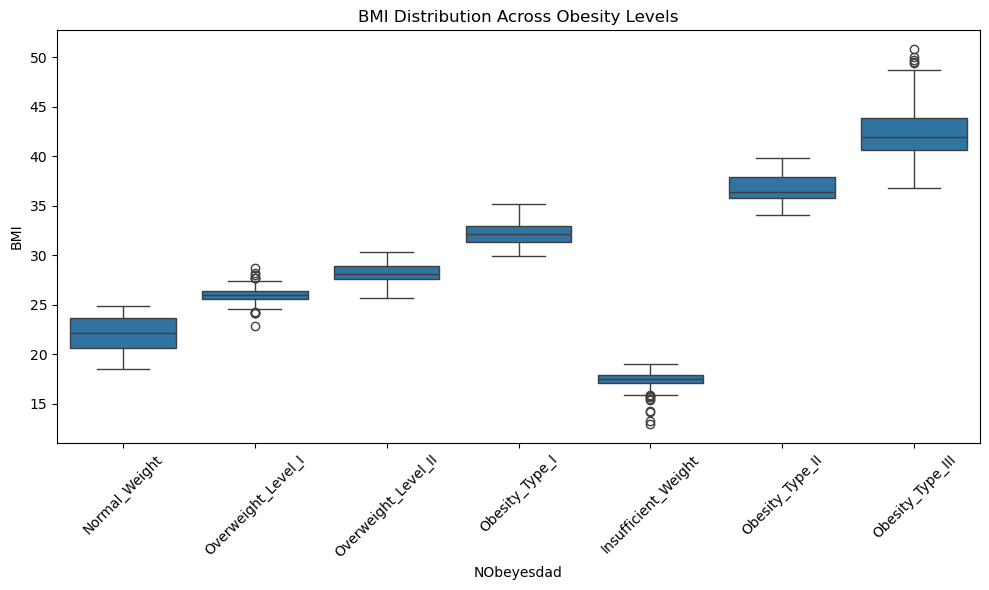

In [13]:
# 4. BMI Calculation and Analysis
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='BMI')
plt.xticks(rotation=45)
plt.title('BMI Distribution Across Obesity Levels')
plt.tight_layout()
plt.show()

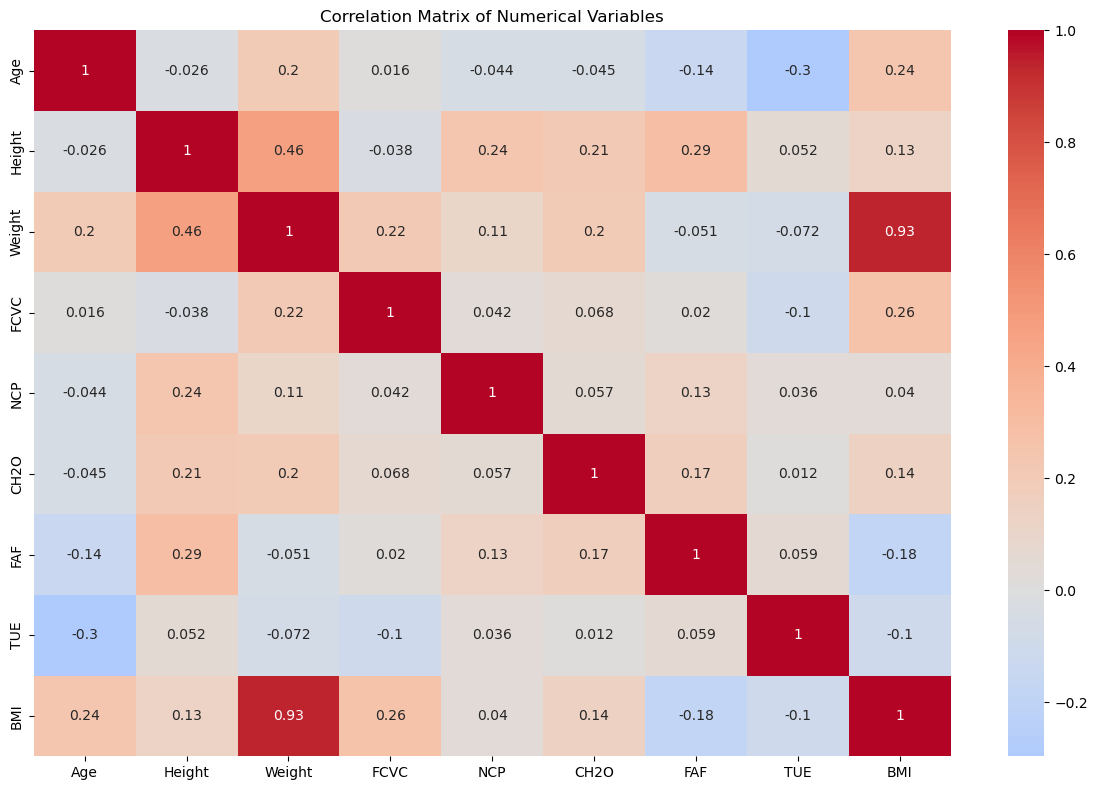

In [14]:
# 6. Correlation Analysis for Numerical Variables
numerical_cols.append('BMI')
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

In [15]:
# 7. Statistical Summary
print("\nNumerical Variables Summary Statistics:")
print(df[numerical_cols].describe())


Numerical Variables Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE          BMI  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866    29.700159  
std       0.612953     0.850592     0.608927     8.011337  
min       1.000000     0.000000     0.000000    12.9

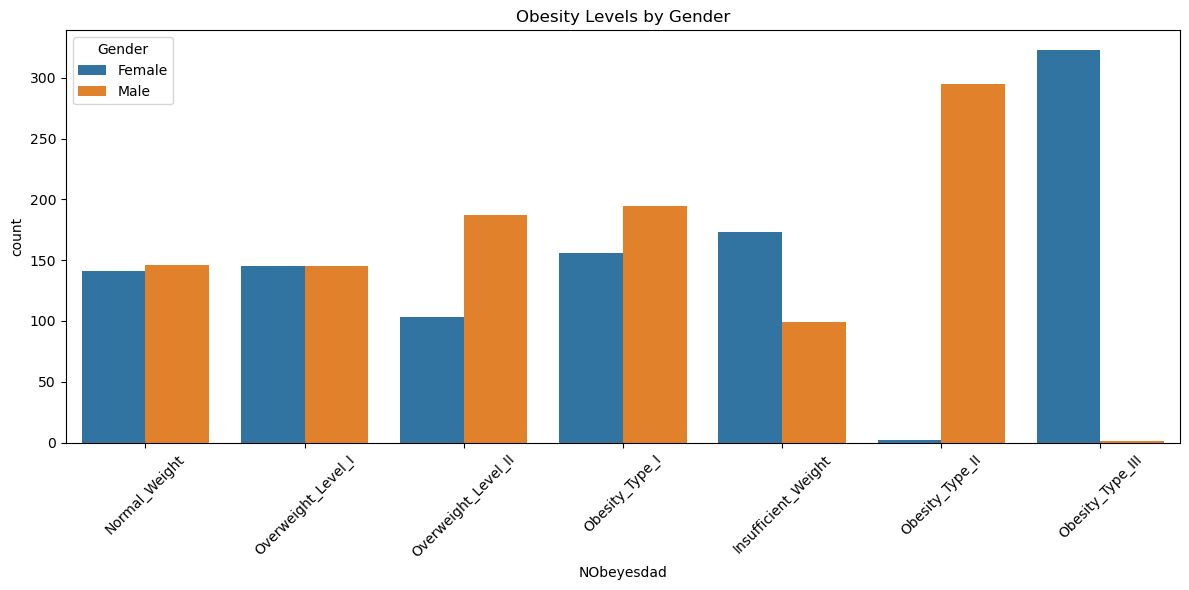

In [16]:
# 8. Gender Distribution Across Obesity Levels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NObeyesdad', hue='Gender')
plt.xticks(rotation=45)
plt.title('Obesity Levels by Gender')
plt.tight_layout()
plt.show()

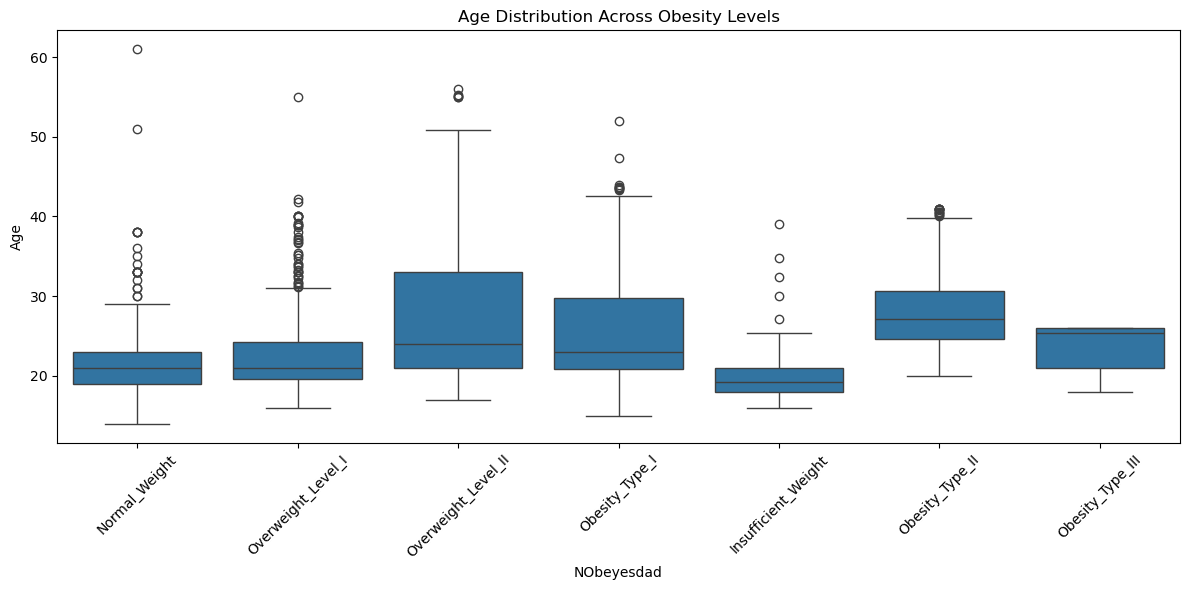

In [17]:
# 9. Age Distribution Across Obesity Levels
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='NObeyesdad', y='Age')
plt.xticks(rotation=45)
plt.title('Age Distribution Across Obesity Levels')
plt.tight_layout()
plt.show()

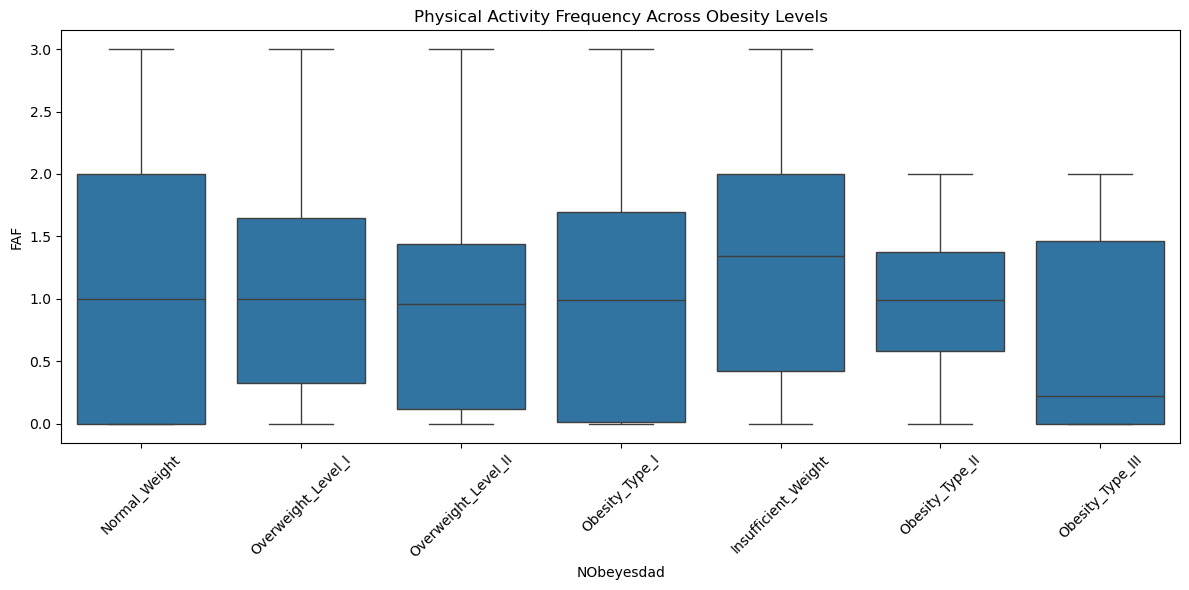

In [18]:
# 10. Physical Activity Frequency Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='NObeyesdad', y='FAF')
plt.xticks(rotation=45)
plt.title('Physical Activity Frequency Across Obesity Levels')
plt.tight_layout()
plt.show()

In [19]:
# Calculate summary statistics for key insights
print("Key Statistics:")
print("Average BMI by Obesity Level:")
print(df.groupby('NObeyesdad')['BMI'].mean().round(2))

Key Statistics:
Average BMI by Obesity Level:
NObeyesdad
Insufficient_Weight    17.40
Normal_Weight          22.01
Obesity_Type_I         32.26
Obesity_Type_II        36.72
Obesity_Type_III       42.27
Overweight_Level_I     25.99
Overweight_Level_II    28.22
Name: BMI, dtype: float64


In [20]:
print("\nPhysical Activity Frequency by Obesity Level:")
print(df.groupby('NObeyesdad')['FAF'].mean().round(2))


Physical Activity Frequency by Obesity Level:
NObeyesdad
Insufficient_Weight    1.25
Normal_Weight          1.25
Obesity_Type_I         0.99
Obesity_Type_II        0.97
Obesity_Type_III       0.66
Overweight_Level_I     1.06
Overweight_Level_II    0.96
Name: FAF, dtype: float64


In [21]:
print("\nGender Distribution (%):")
print(df['Gender'].value_counts(normalize=True).round(3) * 100)


Gender Distribution (%):
Gender
Male      50.6
Female    49.4
Name: proportion, dtype: float64


C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


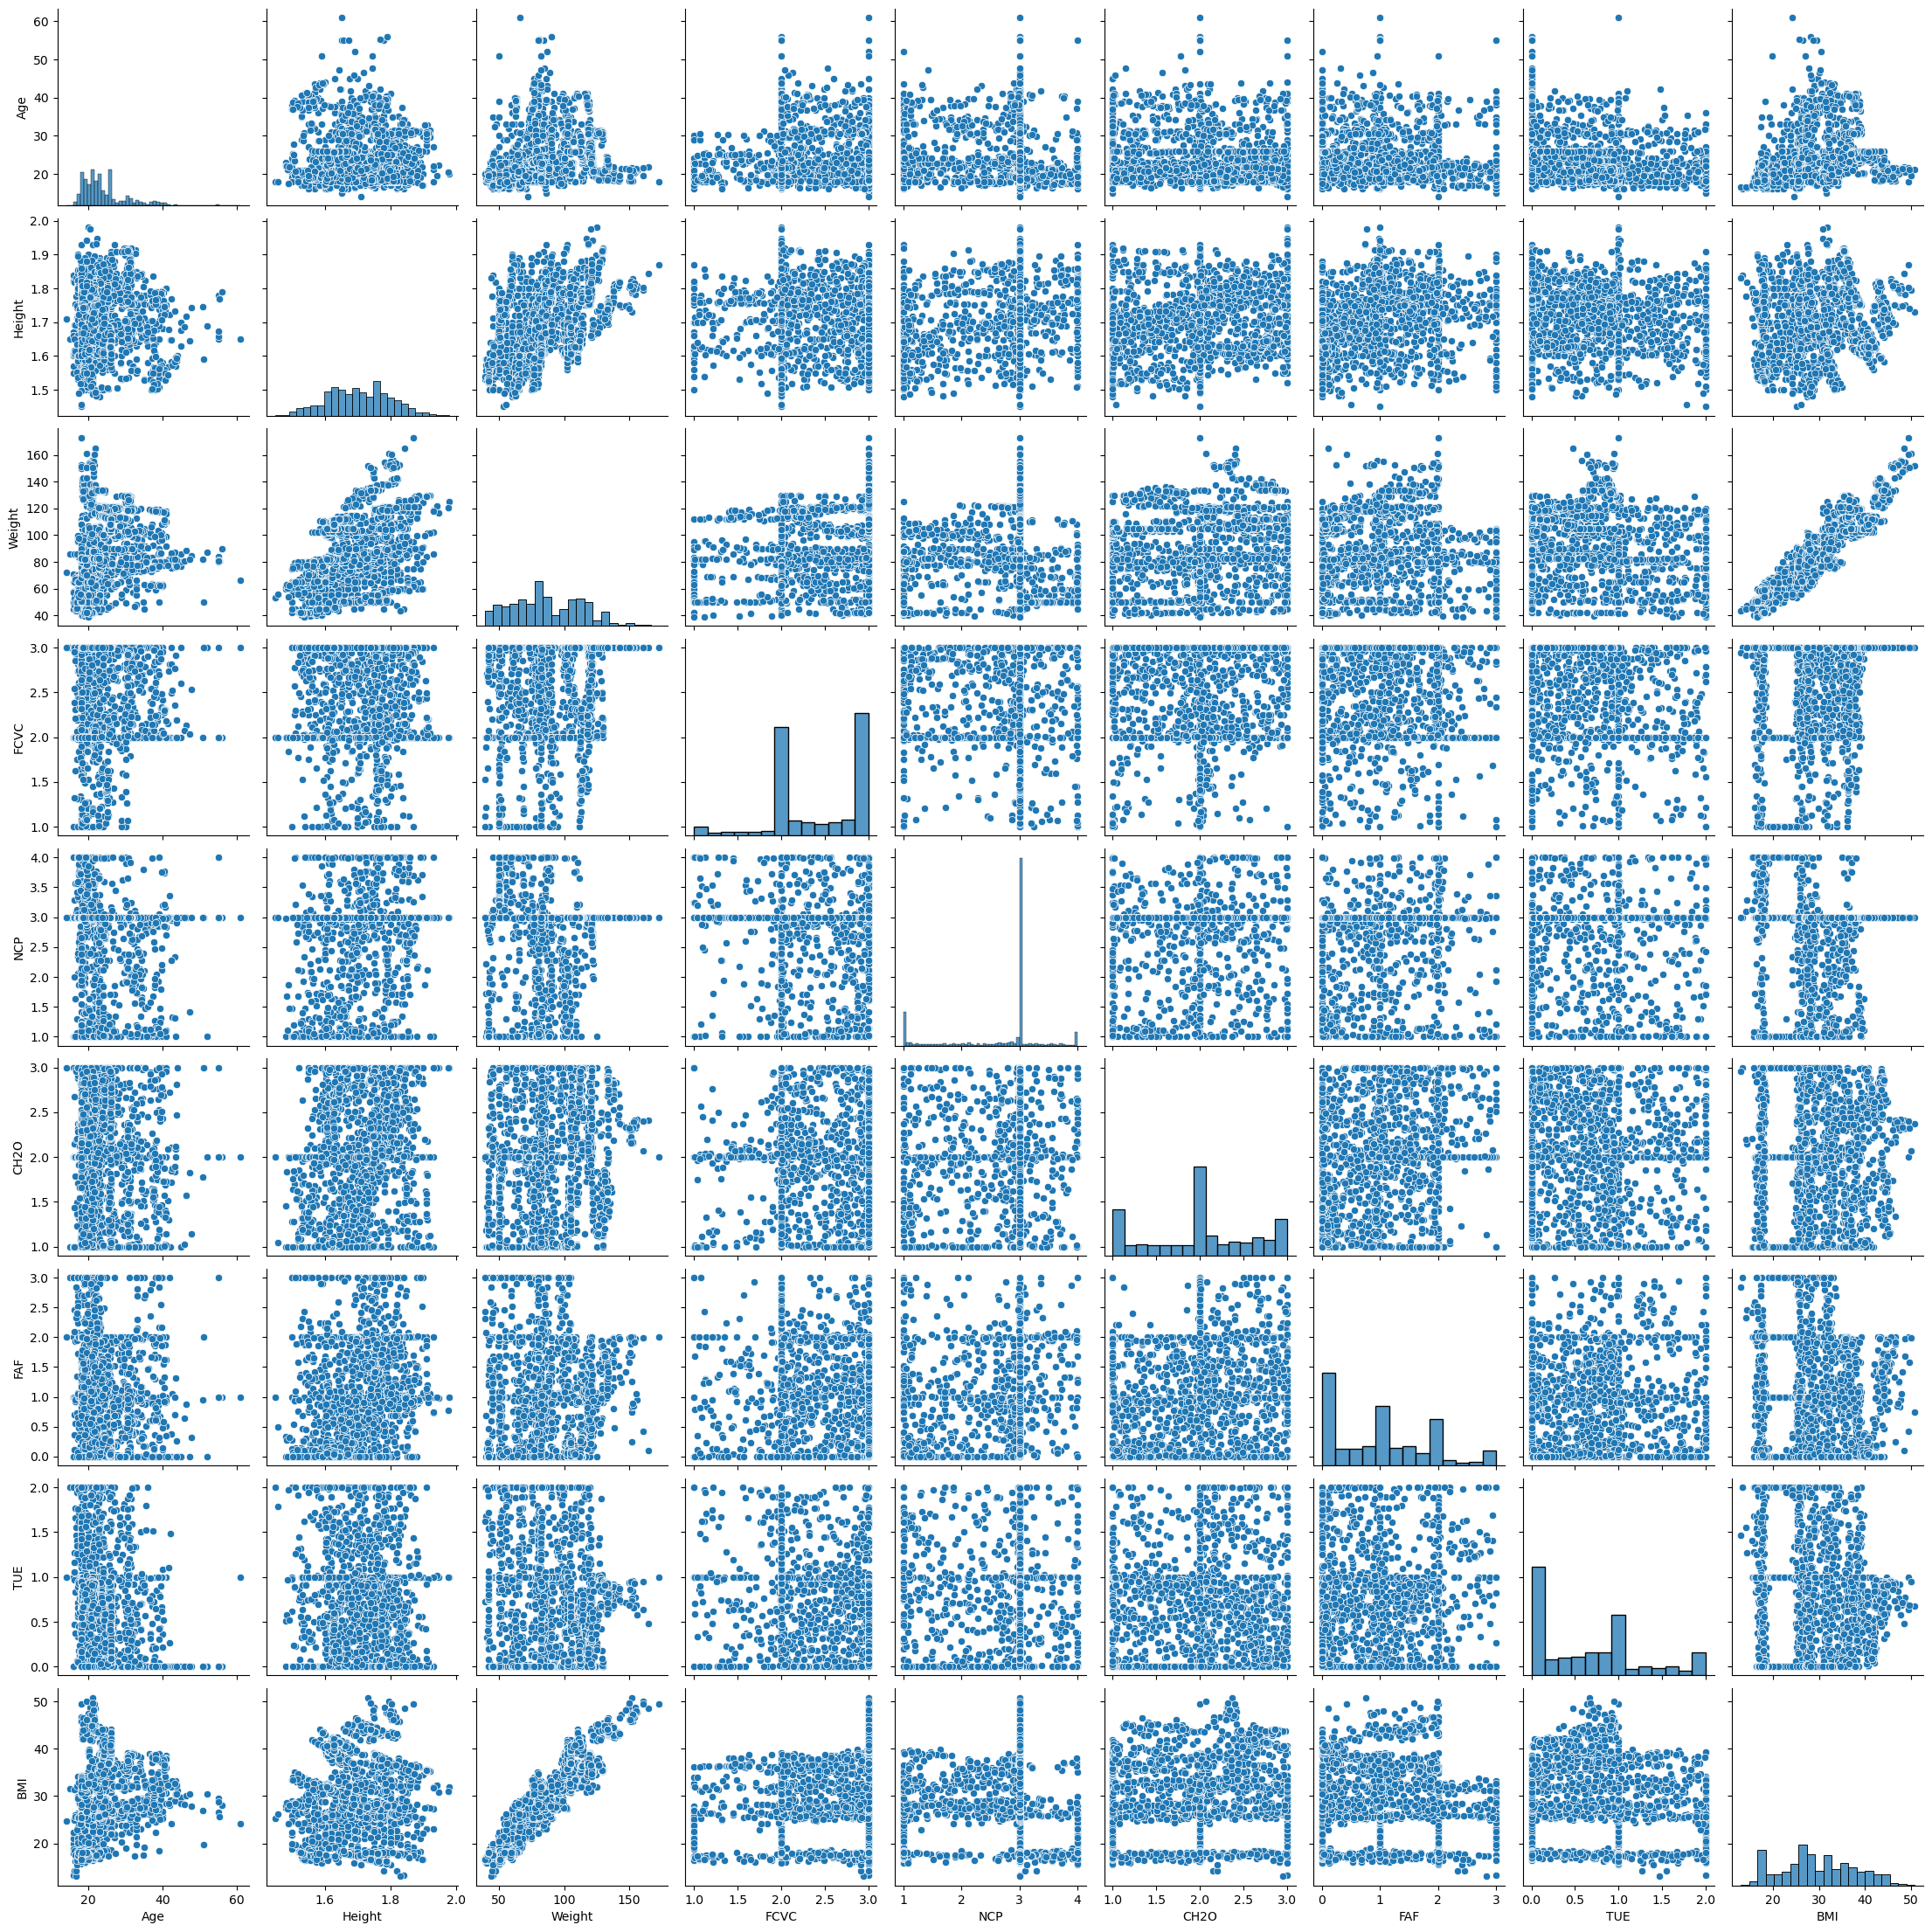

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
# Encoding Categorical Columns to Numerics
from sklearn import preprocessing

# Define the columns to be encoded
columns_to_encode = ['CAEC', 'CALC', 'MTRANS', 'Gender', 'family_history_with_overweight', 
                     'FAVC', 'SMOKE', 'SCC', 'NObeyesdad']

# Initialize the OrdinalEncoder
enc = preprocessing.OrdinalEncoder()

# Fit and transform the selected columns
df[columns_to_encode] = enc.fit_transform(df[columns_to_encode])

# Train Test Split

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting Features for Classification
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2 , random_state=42)
print("Train set",X_train.shape, y_train.shape)
print("Test set",X_test.shape, y_test.shape)

Train set (1688, 17) (1688,)
Test set (423, 17) (423,)


In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [83]:
X_train_s

array([[-1.01311923, -0.53264595, -0.76802941, ..., -0.52565676,
         0.50676114, -0.89297113],
       [-1.01311923, -0.54423543,  0.54607823, ..., -0.52565676,
         0.50676114,  1.72897222],
       [-1.01311923, -0.23925802, -0.4278957 , ..., -0.52565676,
         0.50676114,  0.02553165],
       ...,
       [-1.01311923, -0.22534243, -0.55353551, ...,  1.41169828,
         0.50676114, -0.04053735],
       [-1.01311923, -0.22377429, -0.78767706, ...,  1.41169828,
         0.50676114,  0.27151926],
       [ 0.98705066, -0.68708178,  1.24263647, ..., -0.52565676,
         0.50676114, -0.49825615]])

 # #1 Training K-Nearest Neighbhours

In [95]:
# Using Hyperparameter Tuning for Optimal Parameters
from sklearn.neighbors import KNeighborsClassifier

# Defining parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Initializing and tuning model
knn_model = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

# Evaluating Best parameters and score
print("Best KNN Parameters:", knn_grid_search.best_params_)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [91]:
# Training the Model
classifier=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, weights= 'distance')
classifier.fit(X_train_s, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [92]:
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0. 4. 0. 0. 6. 0. 3. 5. 2. 0. 2. 4. 3. 3. 4. 2. 4. 3. 2. 6. 2. 5. 4. 2.
 1. 6. 6. 4. 4. 0. 4. 5. 6. 1. 0. 4. 2. 1. 1. 1. 2. 3. 1. 1. 5. 0. 3. 5.
 2. 3. 1. 1. 1. 5. 0. 5. 3. 3. 5. 3. 1. 4. 6. 0. 3. 5. 1. 4. 0. 1. 6. 6.
 0. 0. 5. 3. 3. 2. 4. 3. 1. 2. 3. 3. 2. 2. 2. 6. 1. 6. 6. 3. 0. 6. 6. 0.
 5. 2. 5. 3. 2. 2. 4. 2. 6. 2. 1. 4. 4. 3. 2. 1. 2. 1. 0. 2. 2. 3. 6. 5.
 4. 3. 2. 6. 1. 3. 2. 2. 4. 3. 4. 3. 1. 2. 5. 4. 0. 4. 1. 2. 5. 6. 0. 0.
 1. 3. 2. 4. 0. 2. 0. 0. 1. 3. 2. 6. 6. 5. 0. 0. 1. 1. 2. 0. 3. 0. 3. 1.
 5. 6. 1. 1. 3. 4. 2. 6. 2. 6. 2. 2. 0. 3. 0. 5. 3. 2. 5. 4. 3. 3. 0. 4.
 0. 0. 4. 1. 3. 2. 4. 0. 3. 3. 4. 4. 1. 4. 5. 5. 2. 4. 5. 2. 0. 2. 3. 0.
 5. 3. 3. 2. 4. 6. 3. 6. 3. 6. 0. 4. 5. 1. 5. 4. 1. 5. 1. 2. 2. 2. 2. 0.
 6. 6. 5. 2. 2. 2. 1. 2. 2. 0. 5. 2. 0. 6. 1. 6. 2. 3. 2. 2. 4. 4. 5. 2.
 2. 4. 4. 1. 5. 4. 2. 4. 6. 2. 3. 2. 3. 4. 3. 0. 0. 5. 6. 4. 4. 5. 2. 6.
 0. 3. 2. 5. 1. 2. 0. 5. 3. 3. 6. 6. 1. 5. 0. 0. 5. 1. 6. 5. 6. 4. 5. 3.
 0. 4. 5. 6. 2. 4. 6. 1. 0. 1. 4. 0. 1. 4. 2. 2. 4.

In [93]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('---------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.91


Confusion Matrix:
[[55  0  0  0  0  1  0]
 [ 5 47  3  0  0  5  2]
 [ 0  0 75  1  0  1  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  1  0  0 46  4]
 [ 0  1  4  0  0  2 43]] 


---------------------------------------
Classification Report:

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        56
         1.0       0.89      0.76      0.82        62
         2.0       0.89      0.96      0.93        78
         3.0       0.98      0.98      0.98        58
         4.0       1.00      1.00      1.00        63
         5.0       0.84      0.82      0.83        56
         6.0       0.86      0.86      0.86        50

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423



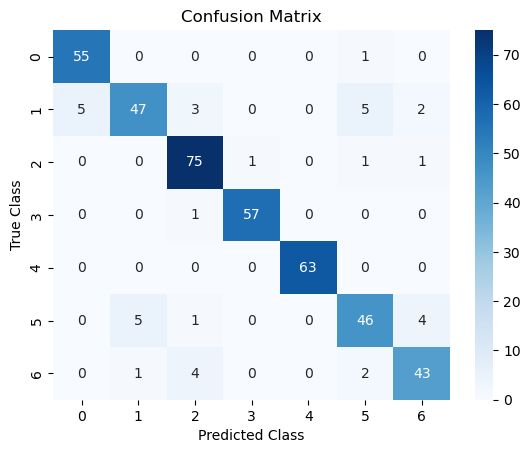

In [115]:
# Plotting the Confusion Matrix
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# #2 Decision Tree

In [96]:
# Hyperparameter Tuning for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialiing and tuning model
dt_model = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Evaluating Best parameters and score
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [97]:
# Training the Model
tree_classifier=DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
)
tree_classifier.fit(X_train_s, y_train)

DecisionTreeClassifier(max_depth=10)

In [98]:
tree_y_pred=tree_classifier.predict(X_test_s)
print(tree_y_pred)

[0. 4. 0. 0. 1. 0. 3. 5. 2. 0. 2. 4. 3. 3. 4. 6. 4. 3. 2. 6. 2. 1. 4. 2.
 1. 6. 6. 4. 4. 0. 4. 6. 6. 1. 0. 4. 2. 1. 1. 1. 1. 3. 1. 1. 5. 0. 3. 1.
 2. 3. 1. 1. 1. 5. 0. 6. 3. 3. 5. 3. 1. 4. 6. 0. 3. 3. 1. 4. 0. 0. 6. 6.
 0. 1. 5. 3. 3. 1. 4. 3. 1. 2. 3. 3. 3. 2. 1. 6. 1. 6. 5. 3. 0. 5. 2. 1.
 5. 2. 1. 3. 2. 2. 4. 2. 6. 2. 1. 4. 4. 3. 2. 1. 2. 1. 0. 2. 2. 3. 6. 1.
 4. 3. 2. 6. 1. 3. 2. 2. 4. 3. 4. 3. 1. 2. 6. 4. 0. 4. 5. 2. 5. 6. 0. 0.
 1. 3. 3. 4. 0. 2. 0. 0. 1. 3. 2. 5. 6. 5. 0. 0. 1. 1. 2. 0. 3. 0. 2. 1.
 5. 6. 1. 6. 3. 4. 2. 6. 2. 6. 2. 5. 0. 3. 0. 5. 3. 2. 5. 4. 3. 3. 0. 4.
 0. 1. 4. 5. 3. 2. 4. 0. 3. 3. 4. 4. 1. 4. 5. 5. 2. 4. 5. 2. 0. 2. 3. 0.
 5. 3. 3. 3. 4. 6. 3. 5. 3. 6. 0. 4. 1. 5. 5. 4. 1. 5. 1. 2. 2. 2. 2. 0.
 6. 6. 5. 2. 2. 2. 1. 2. 2. 1. 5. 2. 0. 1. 1. 6. 2. 3. 2. 2. 4. 4. 5. 2.
 2. 4. 4. 1. 1. 4. 2. 4. 6. 2. 3. 2. 3. 4. 3. 1. 0. 5. 6. 4. 4. 5. 2. 6.
 0. 3. 2. 5. 1. 3. 0. 5. 3. 3. 6. 6. 1. 5. 0. 0. 5. 1. 6. 5. 6. 4. 5. 3.
 1. 4. 5. 6. 2. 4. 6. 1. 0. 1. 4. 0. 1. 4. 2. 2. 4.

In [99]:
from sklearn import metrics
tree_acc=metrics.accuracy_score(y_test, tree_y_pred)
print("accuracy:%.2f\n\n"%(tree_acc))
tree_cm=metrics.confusion_matrix(y_test,tree_y_pred)
print("confusion Matrix: ")
print(tree_cm,"\n\n")
print("-------------------------------------------")
tree_result=metrics.classification_report(y_test, tree_y_pred)
print("Classification Report:\n")
print(tree_result)

accuracy:0.96


confusion Matrix: 
[[53  3  0  0  0  0  0]
 [ 2 60  0  0  0  0  0]
 [ 0  0 73  5  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 51  2]
 [ 0  0  0  0  0  0 50]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        56
         1.0       0.91      0.97      0.94        62
         2.0       1.00      0.94      0.97        78
         3.0       0.92      1.00      0.96        58
         4.0       1.00      1.00      1.00        63
         5.0       1.00      0.91      0.95        56
         6.0       0.96      1.00      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.97      0.96       423
weighted avg       0.97      0.96      0.96       423



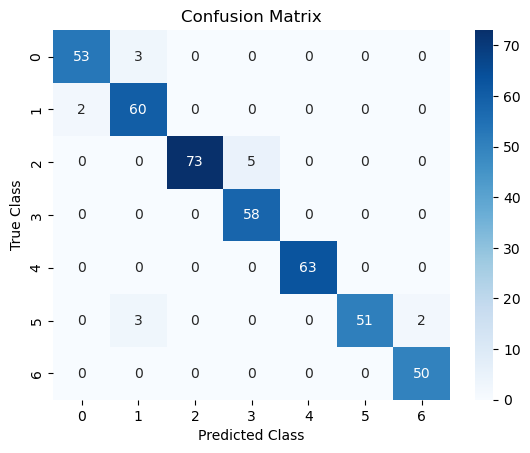

In [121]:
# Plotting the Confusion Matrix
tree_ax=sns.heatmap(tree_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.show()

# #3 Random Forest Model

In [101]:
# Hyperparameter Tuning for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initializing and tuning model
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Evaluating Best parameters and score
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [104]:
# Training Random Forest Model
model = RandomForestClassifier(
    max_depth=20,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
)
model.fit(X_train, y_train)
rf_y_pred = model.predict(X_test)
print(rf_y_pred)

C:\Users\Touseef Iqbal\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[0. 4. 0. 0. 1. 0. 3. 5. 2. 0. 2. 4. 3. 3. 4. 6. 4. 3. 2. 6. 2. 1. 4. 2.
 1. 6. 6. 4. 4. 0. 4. 5. 6. 1. 0. 4. 2. 1. 1. 1. 1. 3. 1. 1. 5. 0. 3. 1.
 2. 3. 1. 1. 1. 5. 0. 6. 3. 3. 5. 3. 1. 4. 6. 0. 3. 2. 1. 4. 0. 1. 6. 6.
 0. 1. 5. 3. 3. 1. 4. 3. 1. 2. 3. 3. 2. 2. 1. 6. 1. 6. 5. 3. 0. 5. 2. 0.
 5. 2. 1. 3. 2. 2. 4. 2. 6. 2. 1. 4. 4. 3. 2. 1. 2. 1. 0. 2. 2. 3. 6. 1.
 4. 3. 2. 6. 1. 3. 2. 2. 4. 3. 4. 3. 1. 2. 6. 4. 0. 4. 5. 2. 5. 6. 0. 0.
 1. 3. 2. 4. 0. 2. 0. 0. 1. 3. 2. 5. 6. 5. 0. 0. 1. 1. 2. 0. 3. 0. 2. 1.
 5. 6. 1. 6. 3. 4. 2. 6. 2. 6. 2. 5. 0. 3. 0. 5. 3. 2. 5. 4. 3. 3. 0. 4.
 0. 1. 4. 5. 3. 2. 4. 0. 3. 3. 4. 4. 1. 4. 5. 5. 2. 4. 5. 2. 0. 2. 3. 0.
 5. 3. 3. 3. 4. 6. 3. 5. 3. 6. 0. 4. 5. 5. 5. 4. 1. 5. 1. 2. 2. 2. 2. 0.
 6. 6. 5. 2. 2. 2. 1. 2. 2. 0. 5. 2. 0. 1. 1. 6. 2. 3. 2. 2. 4. 4. 5. 2.
 2. 4. 4. 1. 1. 4. 3. 4. 6. 2. 3. 2. 3. 4. 3. 1. 0. 5. 6. 4. 4. 5. 2. 6.
 0. 3. 2. 5. 1. 2. 0. 5. 3. 3. 6. 6. 1. 5. 0. 0. 5. 1. 6. 5. 6. 4. 5. 3.
 1. 4. 5. 6. 2. 4. 6. 1. 0. 1. 4. 0. 1. 4. 2. 2. 4.

In [106]:
# Evaluating the Model
rf_acc=metrics.accuracy_score(y_test, rf_y_pred)
print("accuracy:%.2f\n\n"%(rf_acc))
rf_cm=metrics.confusion_matrix(y_test,rf_y_pred)
print("confusion Matrix: ")
print(rf_cm,"\n\n")
print("-------------------------------------------")
rf_result=metrics.classification_report(y_test, rf_y_pred)
print("Classification Report:\n")
print(rf_result)

accuracy:0.99


confusion Matrix: 
[[55  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  0 50]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        56
         1.0       0.97      1.00      0.98        62
         2.0       1.00      0.99      0.99        78
         3.0       0.98      1.00      0.99        58
         4.0       1.00      1.00      1.00        63
         5.0       1.00      0.98      0.99        56
         6.0       1.00      1.00      1.00        50

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423



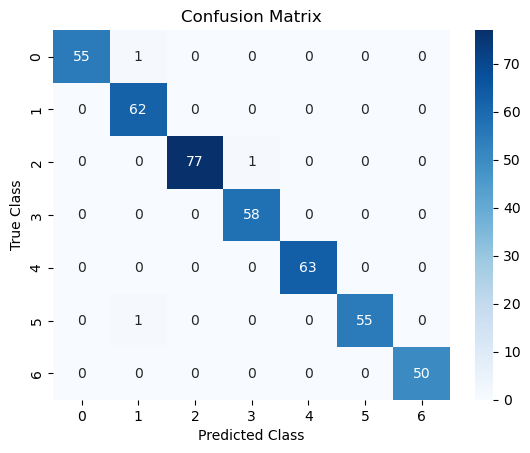

In [130]:
# Plotting Confusion Matrix for Random Forest
rf_ax=sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [123]:
# Comparing the results of Each model
print(f"K-Nearest Neighbors Accuracy: {acc}")
print("K-Nearest Neighbors Classification Report:\n", result)

print(f"Decision Tree Accuracy: {tree_acc}")
print("Decision Tree Classification Report:\n", tree_result)

print(f"Random Forest Accuracy: {rf_acc}")
print("Random Forest Classification Report:\n", rf_result)

K-Nearest Neighbors Accuracy: 0.9125295508274232
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        56
         1.0       0.89      0.76      0.82        62
         2.0       0.89      0.96      0.93        78
         3.0       0.98      0.98      0.98        58
         4.0       1.00      1.00      1.00        63
         5.0       0.84      0.82      0.83        56
         6.0       0.86      0.86      0.86        50

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423

Decision Tree Accuracy: 0.9645390070921985
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        56
         1.0       0.91      0.97      0.94        62
         2.0       1.00      0.94      0.97        78
         3.0